#Diagrama de Voronid.
Definición y propiedades básicas:
Sean $P=\{ P_i\}_{i=1}^n$ un conjunto de $n$ puntos distintos en el plano; Definimos el diagrama de Voronoid de $P$ como la subdivisión del plano en $n$ celdas, uno para cada sitio en $P$ con la propiedad que un punto $q$ se encuentra en la celda correspondiente a un sitio $p_i$, si y solo si $\text{dist}(q,p_i) < \text{dist}(q,p_j)$ para cada $p_j \in P$ con $j \neq i$. Se denota El Diagrama de Voronoid de $P$ por $\text{Vor}(P)$.

Con $\text{dist}(p,q)$ la distancia Euclideana entre los puntos $p$ y $q$.

Además.

A la celda de $V(p)$ que corresponde al citio $p_i$ se denota por $V(p_i)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import Voronoi, voronoi_plot_2d
# Función para calcular la distancia euclidiana
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

In [2]:
#Generar el conjunto de datos.
np.random.seed(0)
points = np.random.rand(10,2)
points

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

In [3]:
#Crear el diagrama de Voronoid.
vor = Voronoi(points,incremental=True)

In [4]:
vor.add_points([[0,0],[1,1]])
vor.close()


In [5]:
vor.ridge_vertices

[[4, 5],
 [2, 5],
 [1, 2],
 [1, 4],
 [8, 11],
 [10, 11],
 [7, 8],
 [7, 9],
 [9, 10],
 [6, 8],
 [3, 6],
 [3, 4],
 [5, 7],
 [0, 9],
 [0, 2],
 [10, 13],
 [0, 12],
 [12, 13],
 [14, 15],
 [-1, 14],
 [15, 17],
 [-1, 16],
 [16, 17],
 [1, 14],
 [3, 15],
 [-1, 12],
 [6, 17],
 [-1, 13],
 [11, 16]]

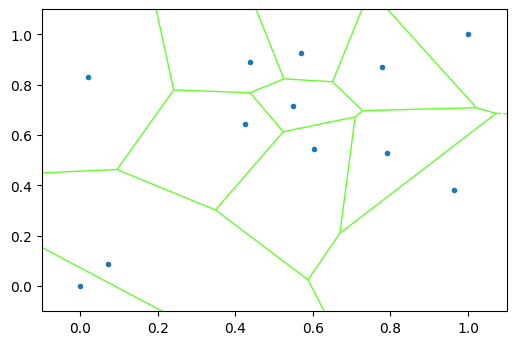

In [6]:
#Dibujar el Diagrama.
fig = voronoi_plot_2d(vor, show_vertices = False, line_colors='#64FE2E' , line_weight = 3 )
fig.dpi=100
n=10
plt.show()

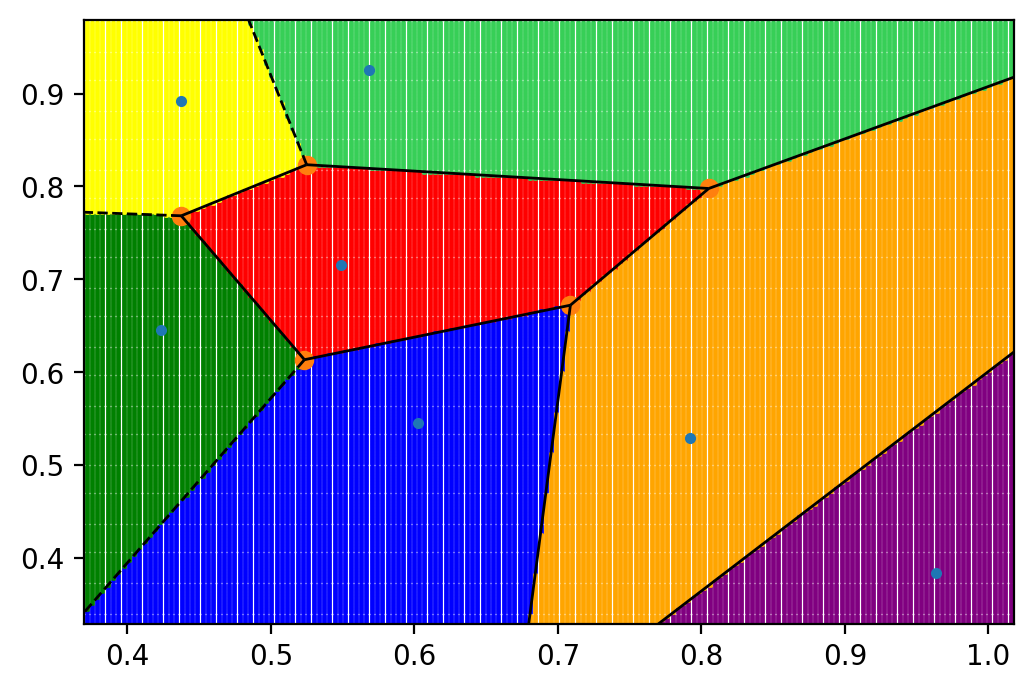

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generar algunos puntos aleatorios
np.random.seed(0)
num_cen = 7
BANCOS_B = [[19.325816504757935, -99.06833749457947],
            [19.348546204506032, -99.04710683734932],
            [19.359717269516455, -99.00137926793052],
            [19.368961710146838, -99.05670146128988],
            [19.38629362295441, -99.0462902736097],
            [19.378590778254303, -99.08834330620019],[19.424417335812517, -99.07915696412944]]

points = np.random.rand(num_cen, 2)
#points = np.array(BANCOS_B)

# Calcular el diagrama de Voronoi
vor = Voronoi(points)

# Graficar el diagrama de Voronoi
fig = voronoi_plot_2d(vor)

# Rellenar las celdas con colores aleatorios
#Necesitamos asignar a cada punto del plano un centro.
#x_scpace = np.linspace(19.3,19.5,400)
#y_scpace = np.linspace(-98.9,-99.18,400)

x_scpace = np.linspace(0,1.1,300)
y_scpace = np.linspace(0,1,300)

X_Space = np.array([(x_v,y_v) for x_v in x_scpace for y_v in y_scpace])

#Indices de los clusters
cluster_indices = np.zeros(X_Space.shape[0])

#Inicializar los puntos asignados a cada cluster.
cluster_points= [[] for i in range(num_cen)]

# Asignar cada punto a un cluster
for i, point in enumerate(X_Space):
    min_distance = float("inf")
    for j, centroid in enumerate(points):
        distance = euclidean_distance(point, centroid)
        if distance < min_distance:
            cluster_indices[i] = j
            min_distance = distance
    cluster_points[int(cluster_indices[i])].append(point)

# Graficar los puntos y los centroides
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange','#37CF57']
for i, cluster_var in enumerate(cluster_points):
    x = [point[0] for point in cluster_var]
    y = [point[1] for point in cluster_var]
    plt.scatter(x, y, c=colors[i % len(colors)], marker='s',s=1)
fig.dpi=200
plt.show()

# K- Means

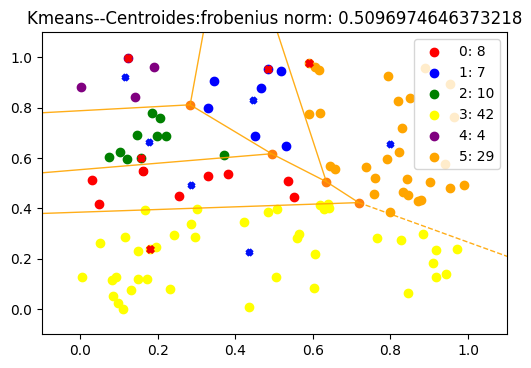

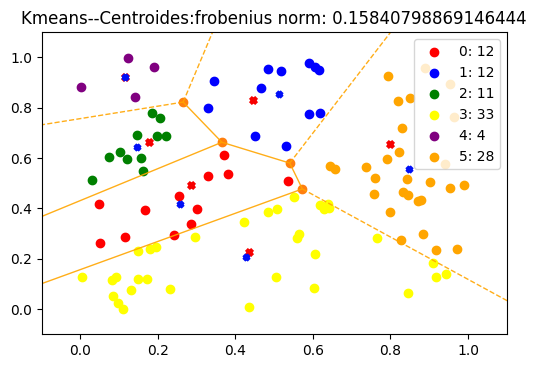

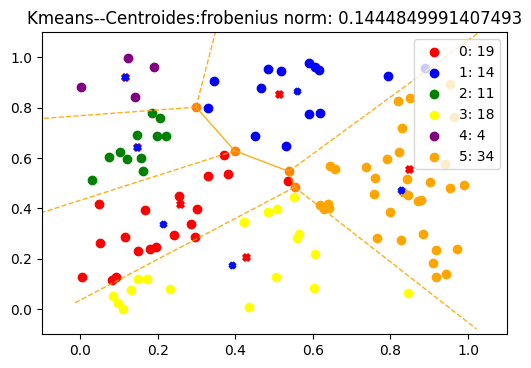

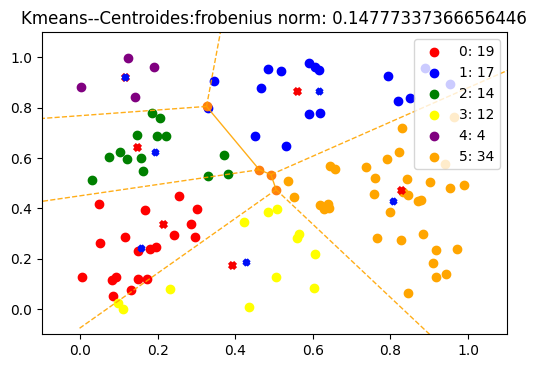

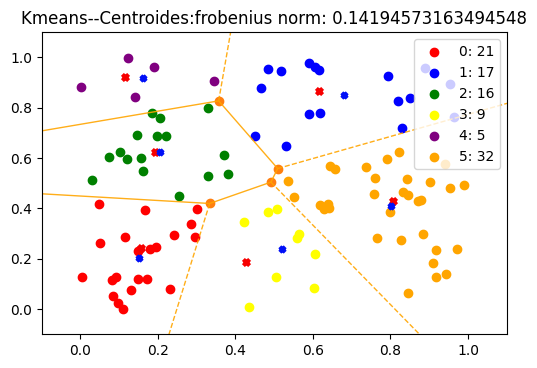

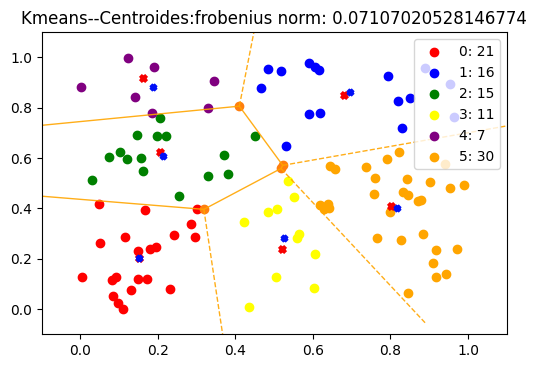

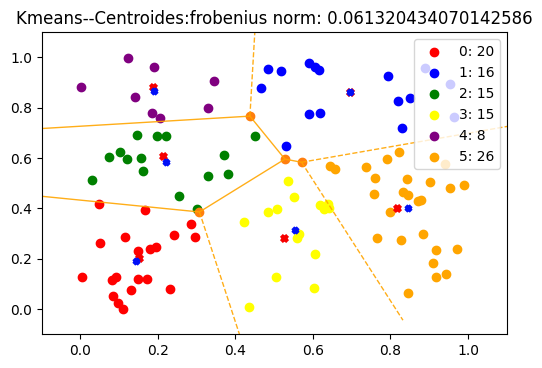

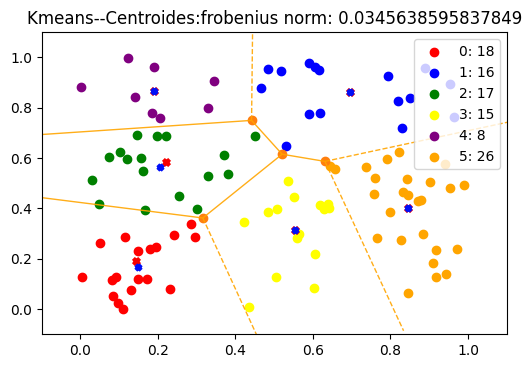

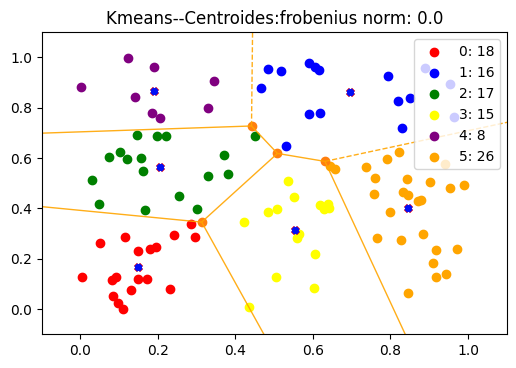

In [27]:
# Generar un conjunto de puntos aleatorios
np.random.seed(23)
points = np.random.rand(100, 2)

# Determinar el número de clusters
num_clusters = 6

# Inicializar los centroides
centroids = points[np.random.choice(points.shape[0], num_clusters, replace=False), :]

# Inicializar los indices de los puntos para cada cluster
cluster_indices = np.zeros(points.shape[0])
cluster_indices_prev = np.zeros(points.shape[0])

# Función para calcular la distancia euclidiana
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

# Blucle hasta que los puntos dejen de cambiar de cluster.
converged = False
# 1.Indices de los clusters 2.Usar Norma-Frobernius. Vamos a usar la opción 1.

while not converged:
  #Inicializar los puntos asignados a cada cluster.
  cluster_points= [[] for i in range(num_clusters)]

  # Asignar cada punto a un cluster
  for i, point in enumerate(points):
      min_distance = float("inf")
      for j, centroid in enumerate(centroids):
          distance = euclidean_distance(point, centroid)
          if distance < min_distance:
              cluster_indices[i] = j
              min_distance = distance
      cluster_points[int(cluster_indices[i])].append(point)
  

  cent_copy = centroids.copy()
  # Calcular los nuevos centroides
  for i in range(num_clusters):
      centroids[i] = np.mean(cluster_points[i], axis=0)
  
  # Verificar si los puntos dejaron de cambiar de cluster usando frobenius_norm
  frobenius_norm = np.linalg.norm(cent_copy-np.array(centroids))
  
  #Creamos el Diagrama De Voronoid.
  
  vor = Voronoi(cent_copy)

  fig = voronoi_plot_2d(vor,show_vertices=True, line_colors='orange',
                        line_width=1, line_alpha=.9, point_size=0)
  # Graficar los puntos y los centroides
  colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
  for i, cluster_points_var in enumerate(cluster_points):
      x = [point[0] for point in cluster_points_var]
      y = [point[1] for point in cluster_points_var]
      cont_lab = len(cluster_points_var)
      plt.scatter(x, y, c=colors[i % len(colors)], label=f'{i}: {cont_lab}' )
  #Centroides Anteriores
  plt.scatter(cent_copy[:, 0], cent_copy[:, 1], marker='x', s=20, linewidth=3, color='#F70000')
  #Centroides Guardados
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=15, linewidth=3, color='#000FF7')
  #Titulo
  plt.title(f'Kmeans--Centroides:frobenius norm: {frobenius_norm}')
  plt.legend()
  #Limites a mostrar en la imagen
  plt.xlim(-0.1, 1.1)
  plt.ylim(-0.1, 1.1)
  #plt.figure(dpi=200)
  fig.dpi=100
  plt.show()
  if np.array_equal(cluster_indices,cluster_indices_prev):
    converged = True
  else:
    cluster_indices_prev = cluster_indices.copy()